#### Analysis of notes as of April 9, 2025. Source: https://x.com/i/communitynotes/download-data

In [1]:
import pandas as pd

In [2]:
#loading all tsv files: notes, noteStatusHistory, and user data

In [2]:
df = pd.read_csv("noteStatusHistory-00000.tsv", sep="\t", low_memory=False)
df

,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,...,currentExpansionStatus,currentGroupStatus,currentDecidedBy,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime
0,1352796878438424576,B021517F4F8F9F372DCD70BB8F8A21A80C12D7EFDE8B2F...,1611366884227,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,-1,NaN,NaN,NaN,29070839,NaN
1,1353415873227177985,D4C9EDB464DF2D4A6D8F68CA8D1F86226B50EB9D3B0F33...,1611514464087,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,-1,NaN,NaN,NaN,29070839,NaN
2,1354586938863443971,C0AF45F4C4B2240E7AB31456957E5D770FF7AFA13627C7...,1611793667892,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),6.0,-1,NaN,NaN,NaN,29070839,NaN
3,1354588003075764229,9C480F7B2E882F19F9FBF75BD13FEA53031875AC42FDF6...,1611793921619,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,NaN,ExpansionPlusModel (v1.1),NaN,-1,NaN,NaN,NaN,29070839,NaN
4,1354588172659920899,931B6CFE7C2FDF3653B0A63DC20DF3C51F8AA3BEB9D613...,1611793962051,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,NaN,ExpansionPlusModel (v1.1),NaN,-1,NaN,NaN,NaN,29070839,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972094,1910143308191727741,717A6C2FDA408AFF891C58C00A6F0D3C5D6CAD233C6FD0...,1744248628077,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NaN,NaN,CoreModel (v1.1),NaN,1744249834232,NaN,NaN,NaN,29070839,NaN
1972095,1910143358942810349,3F80A2AF3F1E210D3F4518B473ED4037FADB5FF5B8CCDD...,1744248640176,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN
1972096,1910143498994810898,85BF40D83F3C2C66038384EF5713B0F32E61D7DA8CE969...,1744248673567,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NaN,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN
1972097,1910143555294888066,E4110AB977FFE262839885936F84ED698C3DCEE13A5238...,1744248686990,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN


In [4]:
#current status of each note
df['currentStatus'].value_counts()

currentStatus
NEEDS_MORE_RATINGS             1728294
CURRENTLY_RATED_HELPFUL         163283
CURRENTLY_RATED_NOT_HELPFUL      80522
Name: count, dtype: int64

In [5]:
#pct of notes stuck in NMR
(1728294 * 100)/1972099

87.63728392945791

In [6]:
#pct of notes rated helpful
(163283 * 100)/1972099

8.27965533170495

In [7]:
#pct of notes rated not helpful
(80522 * 100)/1972099

4.083060738837148

### Plotting the status of all notes

In [4]:
%%R
require(svglite)

UsageError: Cell magic `%%R` not found.


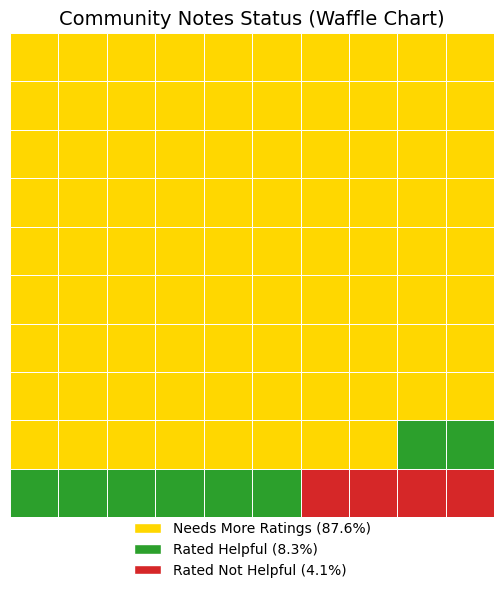

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
data = {
    'Needs More Ratings': 87.6,
    'Rated Helpful': 8.27,
    'Rated Not Helpful': 4.08
}

# Colors
colors = {
    'Needs More Ratings': '#FFD700',  # yellow
    'Rated Helpful': '#2ca02c',       # green
    'Rated Not Helpful': '#d62728'    # red
}

# Convert percentages to grid squares
total_squares = 100
category_counts = {k: round(v * total_squares / 100) for k, v in data.items()}

# Fill list with category labels
waffle = []
for category, count in category_counts.items():
    waffle += [category] * count
waffle += [''] * (total_squares - len(waffle))  # pad if needed

# Create 10x10 grid
grid = np.array(waffle).reshape((10, 10))

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
for row in range(10):
    for col in range(10):
        category = grid[row, col]
        color = colors.get(category, 'white')
        ax.add_patch(plt.Rectangle(
            (col, 9 - row), 1, 1,
            facecolor=color,
            edgecolor='white',      # 👈 border color
            linewidth=0.7           # 👈 border width
        ))

# Legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[k], ec='white') for k in data]
labels = [f"{k} ({data[k]:.1f}%)" for k in data]
ax.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=1, frameon=False)

# Format
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title("Community Notes Status (Waffle Chart)", fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()
# plt.show()
plt.savefig("community_notes_waffle.svg", format="svg")

In [9]:
#pct of notes rated helpful 
(163283*100)/1972099

8.27965533170495

In [10]:
users = pd.read_csv("userEnrollment-00000.tsv", sep="\t", low_memory=False)
users

,participantId,enrollmentState,successfulRatingNeededToEarnIn,timestampOfLastStateChange,timestampOfLastEarnOut,modelingPopulation,modelingGroup,numberOfTimesEarnedOut
0,544F5C7BB68BCC9AC3E28D9E8AEDE7AF4101B5B7A4A2B3...,newUser,5,1730339155731,1,CORE,13.0,0
1,B2D8708DD64F4A263D237C309DDFC40F96962E5B6CF8E2...,newUser,5,1711877500977,1,CORE,13.0,0
2,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,earnedOutAcknowledged,12,1737957023420,1737954217871,CORE,13.0,1
3,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,earnedIn,5,1711877500977,1,CORE,13.0,0
4,1C0972F584F1BD912FB957D99A854609C93213D0A9C361...,earnedIn,5,1721693846234,1,CORE,13.0,0
...,...,...,...,...,...,...,...,...
1150220,26816ABA137BDEE0322F39A9C0EB629E5ABA543FC0B5E5...,newUser,5,1743990214537,1,CORE,9.0,0
1150221,DB4CDB163A8A214A14F7382FE2CFBC197327E7B66140AA...,newUser,5,1744076612066,1,CORE,19.0,0
1150222,575409F32CA0B26C0AC0A885FBC1553BE7F68C25C9D3C6...,newUser,5,1744076616187,1,CORE,11.0,0
1150223,657A045578E59F90D1483FA655ECC6BEC1A58D3A537551...,newUser,5,1744162953197,1,CORE,14.0,0


In [11]:
#Number of unique participants
users['participantId'].nunique()

1150225

In [12]:
notes = pd.read_csv("new_notes-00000.tsv", sep="\t", low_memory=False)
notes

,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote
0,1783179305159200982,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978050878,1783159712986382830,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,The House failed to pass a border protection l...,0
1,1783181538789605871,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978583415,1783171851818021181,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,1,0,0,0,0,0,0,1,The United States has 50 States https://da...,0
2,1783182562279494134,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978827435,1783154445682979015,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,TikTok only mentions “ban” and chooses to igno...,0
3,1883711635770196070,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1737946826294,1883619411774345444,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,1,This could be considered a threat https://...,0
4,1537142913737428992,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1,0,0,0,0,0,0,1,Forbes has a good rundown of the investigation...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830657,1898799283459006824,ADD67EB42A4FDAA54248F092E94E91FF91E99BEA90A6E6...,1741544001819,1897825705146359856,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,1,Elon musk did not launch PayPal. PayPal began ...,0
1830658,1898803177052316113,ADD67EB42A4FDAA54248F092E94E91FF91E99BEA90A6E6...,1741544930123,1898718733427773593,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,1,Democrats never advocated for a vaccine passpo...,0
1830659,1899650783798337859,ADD67EB42A4FDAA54248F092E94E91FF91E99BEA90A6E6...,1741747015319,1891985620786086067,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,Criticisms of Falun Gong and Shen Yun’s mistre...,0
1830660,1905914376332116270,E440DCFF5F1FDD7B577B8315595B40D53D1813E94CB539...,1743240372151,1905624587867480142,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,1,0,0,1,0,הערות קהילה לא נועדו בשביל דעות אישיות. תשאיר...,0


In [13]:
nnn_count = notes['summary'].str.contains('NNN', na=False).sum()
nnn_count

np.int64(247979)

In [14]:
merged_df = df.merge(notes, on='noteId', how='inner')
merged_df

,noteId,noteAuthorParticipantId_x,createdAtMillis_x,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,...,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote
0,1354586938863443971,C0AF45F4C4B2240E7AB31456957E5D770FF7AFA13627C7...,1611793667892,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,0,0,0,0,0,0,0,1,Wikipedia entry for whales https://en.m.wik...,0
1,1354588003075764229,9C480F7B2E882F19F9FBF75BD13FEA53031875AC42FDF6...,1611793921619,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,0,0,1,0,0,0,0,0,example,0
2,1354588172659920899,931B6CFE7C2FDF3653B0A63DC20DF3C51F8AA3BEB9D613...,1611793962051,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,0,0,0,1,0,0,0,0,This tweet is just explaining how to do someth...,0
3,1354589054889820168,F35972BBD2F99515FD974E9C7AFD899970F2E4A5911513...,1611794172392,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,1,0,0,0,0,0,0,0,This is a test,0
4,1354589707716481025,76C37E2A80FF9B994DDC4762345A2C54A4B47BBD07479C...,1611794328036,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,0,0,0,1,0,0,0,0,Dispassionate explanatory tweet with optimisti...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729877,1910135273926607325,707725802AD6E5C4734E0C24FC050AD79837499E4EE176...,1744246712558,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,"Alejandro Grillasca Bario, aka AG, was found d...",0
1729878,1910135412409917784,B315B31E8AD883DF42406623F490BDF38FF845B5033074...,1744246745576,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,AI. https://en.m.wikipedia.org/wiki/Text-to...,0
1729879,1910135611971039348,EB47D26AC1EAFBC8718AB874DE9229141F2B3D3CEA0C33...,1744246793154,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,0,0,0,1,0,0,0,1,There are several articles that confirmed he d...,0
1729880,1910135787623964776,F735563C1D6CACAE98B239A5BF3B6B29334E5A32093D65...,1744246835033,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,1,0,0,0,0,0,0,1,False. China will raise additional tariffs on ...,0


#### How long did it take for helpful notes to be displayed under posts?

In [15]:
#converting all columns with timestamp in milliseconds to datetime format
# time_columns = ['createdAtMillis_x', 'timestampMillisOfFirstNonNMRStatus', 'timestampMillisOfCurrentStatus', 
#                 'timestampMillisOfLatestNonNMRStatus','timestampMillisOfStatusLock', 'timestampMillisOfRetroLock', 
#                 'timestampMillisOfMostRecentStatusChange', 'timestampMillisOfNmrDueToMinStableCrhTime',
#                 'timestampMinuteOfFinalScoringOutput', 'timestampMillisOfFirstNmrDueToMinStableCrhTime']
# merged_df[time_columns] = merged_df[time_columns].apply(pd.to_datetime, unit='ms')
# merged_df

In [16]:
#filtering notes rated helpful
merged_df = merged_df[merged_df['currentStatus'] == 'CURRENTLY_RATED_HELPFUL']
#calculating time difference between note creation and note being displayed
merged_df['time_difference'] = merged_df['timestampMillisOfFirstNonNMRStatus'] - merged_df['createdAtMillis_x']
merged_df[['noteId', 'tweetId', 'noteAuthorParticipantId_x', 'currentStatus','createdAtMillis_x', 'timestampMillisOfFirstNonNMRStatus', 'timestampMillisOfLatestNonNMRStatus', 'time_difference']]

/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_40930/2366738218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['time_difference'] = merged_df['timestampMillisOfFirstNonNMRStatus'] - merged_df['createdAtMillis_x']


,noteId,tweetId,noteAuthorParticipantId_x,currentStatus,createdAtMillis_x,timestampMillisOfFirstNonNMRStatus,timestampMillisOfLatestNonNMRStatus,time_difference
22,1354823722344001536,1354584030528868352,E4FEC9C3B02EB8B5143C75C0CB5BD2468B31CE2E4EDD1E...,CURRENTLY_RATED_HELPFUL,1611850121474,NaN,NaN,NaN
23,1354827055444201474,1354823209179222018,E4FEC9C3B02EB8B5143C75C0CB5BD2468B31CE2E4EDD1E...,CURRENTLY_RATED_HELPFUL,1611850916145,NaN,NaN,NaN
42,1354831671858782208,1354793190386245641,6EFD46C745CC132580323CB51F434BA514D6A228D1183F...,CURRENTLY_RATED_HELPFUL,1611852016783,NaN,NaN,NaN
76,1354834966698467328,1354783650894721026,FB8A5B50F04AAB7CCEA99B4094EAA1AD8E49E3503EF18E...,CURRENTLY_RATED_HELPFUL,1611852802333,NaN,NaN,NaN
107,1354844480659222530,1354518514317602819,22D363DF917856D91BA6AABD74C69D96AC1A2F4117CBE9...,CURRENTLY_RATED_HELPFUL,1611855070638,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1729732,1910101020417363989,1909939274104897772,61D044A7CA1294A5B6F994573DBBE933EB3BB2CA2AC483...,CURRENTLY_RATED_HELPFUL,1744238545885,1.744248e+12,1.744248e+12,8962494.0
1729746,1910104168343224631,1910092503782400144,D2FF68C49E58D21CA7F316FB777A088542C1964560C48B...,CURRENTLY_RATED_HELPFUL,1744239296409,1.744247e+12,1.744247e+12,7596133.0
1729773,1910112586181259378,1910032313045639523,27CFDC14BAEA2A0D03A06E70062384CE5FDDC8A01D74C0...,CURRENTLY_RATED_HELPFUL,1744241303378,1.744249e+12,1.744249e+12,7423086.0
1729808,1910121181539410258,1910092503782400144,C4F6D0A60A0AE5691FA55F53E389212D10E9C369727674...,CURRENTLY_RATED_HELPFUL,1744243352672,1.744249e+12,1.744249e+12,5373792.0


In [17]:
null_count = merged_df['time_difference'].isna().sum()
print(null_count)

820


In [18]:
merged_df = merged_df.dropna(subset=['time_difference'])
#converting all time columns in milliseconds to datetime, except time_difference, which i will convert to timedelta to knonw the difference in days and hours 
time_columns = ['createdAtMillis_x', 'timestampMillisOfFirstNonNMRStatus', 'timestampMillisOfCurrentStatus', 'timestampMillisOfLatestNonNMRStatus']
merged_df[time_columns] = merged_df[time_columns].apply(pd.to_datetime, unit='ms')
merged_df['time_difference'] = pd.to_timedelta(
    merged_df['timestampMillisOfFirstNonNMRStatus'] - merged_df['createdAtMillis_x'],
    unit='ms'
)
merged_df

,noteId,noteAuthorParticipantId_x,createdAtMillis_x,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,...,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote,time_difference
22869,1527099877036941312,8BBA91C4957E89E3F3E7375E11B946CC2326AC39FC2BFF...,2022-05-19 01:32:37.486,2022-07-14 21:16:25.376,CURRENTLY_RATED_HELPFUL,2024-07-25 15:07:48.424,CURRENTLY_RATED_HELPFUL,2022-07-14 21:16:25.376,CURRENTLY_RATED_HELPFUL,1.674003e+12,...,0,0,0,0,0,0,1,Apple has not announced any plans to make wind...,0,56 days 19:43:47.890000
22899,1527130505040130050,4161F443D87A638EFA1B5E49037B00C2F178F3DB437E04...,2022-05-19 03:34:19.770,2022-05-29 18:01:45.237,CURRENTLY_RATED_HELPFUL,2024-07-25 15:07:48.424,CURRENTLY_RATED_HELPFUL,2022-05-29 18:01:45.237,CURRENTLY_RATED_HELPFUL,1.674003e+12,...,0,0,0,0,0,0,1,Costco does not have plans to raise the price ...,0,10 days 14:27:25.467000
22954,1527368802995843077,623A4B928ECC0D059ED6BC68047BB6706E39D05C2DD0F6...,2022-05-19 19:21:14.432,2022-05-19 23:56:18.357,CURRENTLY_RATED_HELPFUL,2024-07-25 15:07:48.424,CURRENTLY_RATED_HELPFUL,2022-05-19 23:56:18.357,CURRENTLY_RATED_HELPFUL,1.674003e+12,...,0,0,0,0,0,0,1,Casey Newton later corrected himself saying th...,0,0 days 04:35:03.925000
22967,1527464796160786432,2C241FFA786BB5B780A626104063F2B5DC3132F012A3E9...,2022-05-20 01:42:40.985,2022-05-20 08:56:11.303,CURRENTLY_RATED_HELPFUL,2024-07-25 15:07:48.424,CURRENTLY_RATED_HELPFUL,2022-05-20 08:56:11.303,CURRENTLY_RATED_HELPFUL,1.674003e+12,...,0,0,0,0,0,0,1,This title is fake. The actual title of the ar...,0,0 days 07:13:30.318000
22968,1527466797087313920,76D75596753AC43955A8B72188F1AE7C4CF088C9E94257...,2022-05-20 01:50:38.043,2022-05-20 08:56:11.303,CURRENTLY_RATED_HELPFUL,2024-07-25 15:07:48.424,CURRENTLY_RATED_HELPFUL,2022-05-20 08:56:11.303,CURRENTLY_RATED_HELPFUL,1.674003e+12,...,0,0,0,0,0,0,1,This screenshot has been manipulated to alter ...,0,0 days 07:05:33.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729732,1910101020417363989,61D044A7CA1294A5B6F994573DBBE933EB3BB2CA2AC483...,2025-04-09 22:42:25.885,2025-04-10 01:11:48.379,CURRENTLY_RATED_HELPFUL,2025-04-10 01:59:02.361,CURRENTLY_RATED_HELPFUL,2025-04-10 01:11:48.379,CURRENTLY_RATED_HELPFUL,NaN,...,0,0,0,0,0,0,1,No hay evidencia científica que respalde los b...,0,0 days 02:29:22.494000
1729746,1910104168343224631,D2FF68C49E58D21CA7F316FB777A088542C1964560C48B...,2025-04-09 22:54:56.409,2025-04-10 01:01:32.542,CURRENTLY_RATED_HELPFUL,2025-04-10 01:59:02.361,CURRENTLY_RATED_HELPFUL,2025-04-10 01:01:32.542,CURRENTLY_RATED_HELPFUL,NaN,...,0,0,0,0,0,0,1,This is completely false. Neither Hailey Biebe...,0,0 days 02:06:36.133000
1729773,1910112586181259378,27CFDC14BAEA2A0D03A06E70062384CE5FDDC8A01D74C0...,2025-04-09 23:28:23.378,2025-04-10 01:32:06.464,CURRENTLY_RATED_HELPFUL,2025-04-10 01:59:02.361,CURRENTLY_RATED_HELPFUL,2025-04-10 01:32:06.464,CURRENTLY_RATED_HELPFUL,NaN,...,0,0,0,0,0,0,1,The original image (PIA22960) does not show an...,1,0 days 02:03:43.086000
1729808,1910121181539410258,C4F6D0A60A0AE5691FA55F53E389212D10E9C369727674...,2025-04-10 00:02:32.672,2025-04-10 01:32:06.464,CURRENTLY_RATED_HELPFUL,2025-04-10 01:59:02.361,CURRENTLY_RATED_HELPFUL,2025-04-10 01:32:06.464,CURRENTLY_RATED_HELPFUL,NaN,...,0,0,0,0,0,0,1,This is misleading post. BBC News did not repo...,0,0 days 01:29:33.792000


In [19]:
merged_df = merged_df[['noteId', 'tweetId', 'noteAuthorParticipantId_x', 'createdAtMillis_x', 'timestampMillisOfFirstNonNMRStatus','firstNonNMRStatus', 'currentStatus','summary', 'time_difference']]   

In [20]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [21]:
#filtering to all currently helpful notes about measles
filtered_df = merged_df[merged_df['summary'].str.contains('measles', case=False, na=False)]
filtered_df.sort_values(by='time_difference', ascending=False).head(30)

,noteId,tweetId,noteAuthorParticipantId_x,createdAtMillis_x,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,currentStatus,summary,time_difference
89709,1662563933339926528,1662510550801350658,E9E1216A6501D0FB775DDCC53BB8326334C827FDAED70C...,2023-05-27 20:58:25.310,2023-06-09 12:12:34.559,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,Measles caused 2.6 million deaths per year unt...,12 days 15:14:09.249000
1704371,1905534211525619895,1905396650962526372,2042E5C10A13336985B0D511ACAA10CA4B85B41D4F9D95...,2025-03-28 08:15:33.799,2025-04-07 12:53:47.436,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,There is no connection between vaccines and au...,10 days 04:38:13.637000
376403,1735460473225544108,1735422765392634311,F735563C1D6CACAE98B239A5BF3B6B29334E5A32093D65...,2023-12-15 00:43:14.770,2023-12-21 16:18:57.904,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,The claim all vaccines are harmful and poison ...,6 days 15:35:43.134000
632144,1770788587761537193,1770646516388290890,A3295E8148695BCF2940B7C0ADAD3472612B3D31F13EF8...,2024-03-21 12:24:33.641,2024-03-26 22:58:00.866,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,投稿主の「麻疹では死なない」という主張はデマです。 世界保健機関（WHO）と米疾病対策...,5 days 10:33:27.225000
1482503,1877271597574242371,1876960239523623175,9AB257CFF6129DB32E6F457B121FAEF919DB1AA8ECA707...,2025-01-09 08:30:01.538,2025-01-13 10:47:47.750,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,Kızamık aşısının yan etkileri genellikle hafif...,4 days 02:17:46.212000
262965,1716027531650883892,1715721317037592682,F6700CE6C398D88F68989BD0B4936602C790E4F7DAA7C6...,2023-10-22 09:43:40.456,2023-10-25 20:31:00.296,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,"Japan vaccinate children under two for: polio,...",3 days 10:47:19.840000
1562160,1885603940173037612,1885536880160030877,636866D6E36E9456D33F1471F59CC06914EFA7EBC6BA9C...,2025-02-01 08:19:46.821,2025-02-03 16:38:03.973,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,5 yaş altı çocuk ölüm hızının düşmesinde yukar...,2 days 08:18:17.152000
400216,1739140230458794266,1739044630036181024,F735563C1D6CACAE98B239A5BF3B6B29334E5A32093D65...,2023-12-25 04:25:17.260,2023-12-26 05:00:03.262,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,The measles vaccine is not useless. Two doses ...,1 days 00:34:46.002000
356050,1732593543154213159,1732560220121891063,F735563C1D6CACAE98B239A5BF3B6B29334E5A32093D65...,2023-12-07 02:51:05.377,2023-12-08 03:04:43.234,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,"No, the MMR vaccine does not cause cancer and ...",1 days 00:13:37.857000
1216010,1843671693866480120,1843510163745214741,DBC1F630DB185340E8316D1A1AD70238C3C4261189318D...,2024-10-08 15:16:00.238,2024-10-09 09:24:51.101,CURRENTLY_RATED_HELPFUL,CURRENTLY_RATED_HELPFUL,例えばワクチン接種が義務付けられている麻しんでは現代の死亡率は0.1%ですがワクチンが生まれ...,0 days 18:08:50.863000


In [22]:
##checking shadow of ezra note. nh is notehistory
nh_df = pd.read_csv("noteStatusHistory-00000.tsv", sep="\t", low_memory=False)
nh_df

,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,...,currentExpansionStatus,currentGroupStatus,currentDecidedBy,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime
0,1352796878438424576,B021517F4F8F9F372DCD70BB8F8A21A80C12D7EFDE8B2F...,1611366884227,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,-1,NaN,NaN,NaN,29070839,NaN
1,1353415873227177985,D4C9EDB464DF2D4A6D8F68CA8D1F86226B50EB9D3B0F33...,1611514464087,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,-1,NaN,NaN,NaN,29070839,NaN
2,1354586938863443971,C0AF45F4C4B2240E7AB31456957E5D770FF7AFA13627C7...,1611793667892,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),6.0,-1,NaN,NaN,NaN,29070839,NaN
3,1354588003075764229,9C480F7B2E882F19F9FBF75BD13FEA53031875AC42FDF6...,1611793921619,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,NaN,ExpansionPlusModel (v1.1),NaN,-1,NaN,NaN,NaN,29070839,NaN
4,1354588172659920899,931B6CFE7C2FDF3653B0A63DC20DF3C51F8AA3BEB9D613...,1611793962051,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,NaN,ExpansionPlusModel (v1.1),NaN,-1,NaN,NaN,NaN,29070839,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972094,1910143308191727741,717A6C2FDA408AFF891C58C00A6F0D3C5D6CAD233C6FD0...,1744248628077,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NaN,NaN,CoreModel (v1.1),NaN,1744249834232,NaN,NaN,NaN,29070839,NaN
1972095,1910143358942810349,3F80A2AF3F1E210D3F4518B473ED4037FADB5FF5B8CCDD...,1744248640176,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN
1972096,1910143498994810898,85BF40D83F3C2C66038384EF5713B0F32E61D7DA8CE969...,1744248673567,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NaN,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN
1972097,1910143555294888066,E4110AB977FFE262839885936F84ED698C3DCEE13A5238...,1744248686990,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN


In [23]:
time_columns = ['createdAtMillis', 'timestampMillisOfFirstNonNMRStatus', 'timestampMillisOfCurrentStatus', 'timestampMillisOfLatestNonNMRStatus', 'timestampMillisOfStatusLock',
'timestampMillisOfRetroLock', 'timestampMillisOfMostRecentStatusChange', 'timestampMillisOfNmrDueToMinStableCrhTime', 'timestampMinuteOfFinalScoringOutput', 'timestampMillisOfFirstNmrDueToMinStableCrhTime'] 
shadow_of_ezra = nh_df[nh_df['noteId'] == 1903157869093990570]
shadow_of_ezra[time_columns] = shadow_of_ezra[time_columns].apply(pd.to_datetime, unit='ms')
shadow_of_ezra

/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_40930/2947609560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shadow_of_ezra[time_columns] = shadow_of_ezra[time_columns].apply(pd.to_datetime, unit='ms')


,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,...,currentExpansionStatus,currentGroupStatus,currentDecidedBy,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime
1930567,1903157869093990570,2A6B630D0AEA2ACC36E2189A989B042C8F44788D5C6526...,2025-03-21 18:52:49.613,2025-03-21 21:40:03.538,CURRENTLY_RATED_HELPFUL,2025-04-04 19:01:52.377,NEEDS_MORE_RATINGS,2025-03-21 21:40:03.538,CURRENTLY_RATED_HELPFUL,2025-04-04 19:01:52.377,...,NEEDS_MORE_RATINGS,NaN,CoreWithTopicsModel (v1.1),NaN,2025-03-21 23:31:06.259,1969-12-31 23:59:59.999,NaN,NaN,1970-01-01 08:04:30.839,2025-03-21 20:28:14.023


### Checking how long a note has had NMR status

In [24]:
nh_df

,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,...,currentExpansionStatus,currentGroupStatus,currentDecidedBy,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime
0,1352796878438424576,B021517F4F8F9F372DCD70BB8F8A21A80C12D7EFDE8B2F...,1611366884227,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,-1,NaN,NaN,NaN,29070839,NaN
1,1353415873227177985,D4C9EDB464DF2D4A6D8F68CA8D1F86226B50EB9D3B0F33...,1611514464087,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,-1,NaN,NaN,NaN,29070839,NaN
2,1354586938863443971,C0AF45F4C4B2240E7AB31456957E5D770FF7AFA13627C7...,1611793667892,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),6.0,-1,NaN,NaN,NaN,29070839,NaN
3,1354588003075764229,9C480F7B2E882F19F9FBF75BD13FEA53031875AC42FDF6...,1611793921619,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,NaN,ExpansionPlusModel (v1.1),NaN,-1,NaN,NaN,NaN,29070839,NaN
4,1354588172659920899,931B6CFE7C2FDF3653B0A63DC20DF3C51F8AA3BEB9D613...,1611793962051,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,NaN,ExpansionPlusModel (v1.1),NaN,-1,NaN,NaN,NaN,29070839,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972094,1910143308191727741,717A6C2FDA408AFF891C58C00A6F0D3C5D6CAD233C6FD0...,1744248628077,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NaN,NaN,CoreModel (v1.1),NaN,1744249834232,NaN,NaN,NaN,29070839,NaN
1972095,1910143358942810349,3F80A2AF3F1E210D3F4518B473ED4037FADB5FF5B8CCDD...,1744248640176,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN
1972096,1910143498994810898,85BF40D83F3C2C66038384EF5713B0F32E61D7DA8CE969...,1744248673567,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NaN,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN
1972097,1910143555294888066,E4110AB977FFE262839885936F84ED698C3DCEE13A5238...,1744248686990,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN


In [25]:
new_df = nh_df[nh_df['currentStatus'] == 'NEEDS_MORE_RATINGS']
new_df

,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,...,currentExpansionStatus,currentGroupStatus,currentDecidedBy,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime
0,1352796878438424576,B021517F4F8F9F372DCD70BB8F8A21A80C12D7EFDE8B2F...,1611366884227,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,-1,NaN,NaN,NaN,29070839,NaN
1,1353415873227177985,D4C9EDB464DF2D4A6D8F68CA8D1F86226B50EB9D3B0F33...,1611514464087,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,-1,NaN,NaN,NaN,29070839,NaN
2,1354586938863443971,C0AF45F4C4B2240E7AB31456957E5D770FF7AFA13627C7...,1611793667892,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),6.0,-1,NaN,NaN,NaN,29070839,NaN
3,1354588003075764229,9C480F7B2E882F19F9FBF75BD13FEA53031875AC42FDF6...,1611793921619,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,NaN,ExpansionPlusModel (v1.1),NaN,-1,NaN,NaN,NaN,29070839,NaN
4,1354588172659920899,931B6CFE7C2FDF3653B0A63DC20DF3C51F8AA3BEB9D613...,1611793962051,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,NaN,ExpansionPlusModel (v1.1),NaN,-1,NaN,NaN,NaN,29070839,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972094,1910143308191727741,717A6C2FDA408AFF891C58C00A6F0D3C5D6CAD233C6FD0...,1744248628077,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NaN,NaN,CoreModel (v1.1),NaN,1744249834232,NaN,NaN,NaN,29070839,NaN
1972095,1910143358942810349,3F80A2AF3F1E210D3F4518B473ED4037FADB5FF5B8CCDD...,1744248640176,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN
1972096,1910143498994810898,85BF40D83F3C2C66038384EF5713B0F32E61D7DA8CE969...,1744248673567,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NaN,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN
1972097,1910143555294888066,E4110AB977FFE262839885936F84ED698C3DCEE13A5238...,1744248686990,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NEEDS_MORE_RATINGS,NEEDS_MORE_RATINGS,CoreModel (v1.1),13.0,1744249834232,NaN,NaN,NaN,29070839,NaN


In [26]:
#converting createdAtMillis to datetime
new_df.loc[:, 'created_time'] = pd.to_datetime(new_df['createdAtMillis'], unit='ms').dt.floor('s')
#setting current time: April 19, 2025
new_df['current_time'] = pd.to_datetime('2025-04-19 00:00:00')
#calculating difference 
new_df.loc[:, 'difference'] = new_df['current_time'] - new_df['created_time']
#cleaning up the hours in the time difference, only keeping the days
import re
new_df['difference'] = new_df['difference'].astype(str)
new_df['difference'] = new_df['difference'].str.extract(r'(\d+) days')[0]
new_df

/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_40930/3843141190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'created_time'] = pd.to_datetime(new_df['createdAtMillis'], unit='ms').dt.floor('s')
/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_40930/3843141190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['current_time'] = pd.to_datetime('2025-04-19 00:00:00')
/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_40930/3843141190.py:6: SettingWithC

,noteId,noteAuthorParticipantId,createdAtMillis,timestampMillisOfFirstNonNMRStatus,firstNonNMRStatus,timestampMillisOfCurrentStatus,currentStatus,timestampMillisOfLatestNonNMRStatus,mostRecentNonNMRStatus,timestampMillisOfStatusLock,...,currentModelingGroup,timestampMillisOfMostRecentStatusChange,timestampMillisOfNmrDueToMinStableCrhTime,currentMultiGroupStatus,currentModelingMultiGroup,timestampMinuteOfFinalScoringOutput,timestampMillisOfFirstNmrDueToMinStableCrhTime,created_time,current_time,difference
0,1352796878438424576,B021517F4F8F9F372DCD70BB8F8A21A80C12D7EFDE8B2F...,1611366884227,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,13.0,-1,NaN,NaN,NaN,29070839,NaN,2021-01-23 01:54:44,2025-04-19,1546
1,1353415873227177985,D4C9EDB464DF2D4A6D8F68CA8D1F86226B50EB9D3B0F33...,1611514464087,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,13.0,-1,NaN,NaN,NaN,29070839,NaN,2021-01-24 18:54:24,2025-04-19,1545
2,1354586938863443971,C0AF45F4C4B2240E7AB31456957E5D770FF7AFA13627C7...,1611793667892,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,6.0,-1,NaN,NaN,NaN,29070839,NaN,2021-01-28 00:27:47,2025-04-19,1541
3,1354588003075764229,9C480F7B2E882F19F9FBF75BD13FEA53031875AC42FDF6...,1611793921619,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,-1,NaN,NaN,NaN,29070839,NaN,2021-01-28 00:32:01,2025-04-19,1541
4,1354588172659920899,931B6CFE7C2FDF3653B0A63DC20DF3C51F8AA3BEB9D613...,1611793962051,NaN,NaN,1721920068424,NEEDS_MORE_RATINGS,NaN,NaN,1.674003e+12,...,NaN,-1,NaN,NaN,NaN,29070839,NaN,2021-01-28 00:32:42,2025-04-19,1541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972094,1910143308191727741,717A6C2FDA408AFF891C58C00A6F0D3C5D6CAD233C6FD0...,1744248628077,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,NaN,1744249834232,NaN,NaN,NaN,29070839,NaN,2025-04-10 01:30:28,2025-04-19,8
1972095,1910143358942810349,3F80A2AF3F1E210D3F4518B473ED4037FADB5FF5B8CCDD...,1744248640176,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,13.0,1744249834232,NaN,NaN,NaN,29070839,NaN,2025-04-10 01:30:40,2025-04-19,8
1972096,1910143498994810898,85BF40D83F3C2C66038384EF5713B0F32E61D7DA8CE969...,1744248673567,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,13.0,1744249834232,NaN,NaN,NaN,29070839,NaN,2025-04-10 01:31:13,2025-04-19,8
1972097,1910143555294888066,E4110AB977FFE262839885936F84ED698C3DCEE13A5238...,1744248686990,NaN,NaN,1744250342361,NEEDS_MORE_RATINGS,NaN,NaN,NaN,...,13.0,1744249834232,NaN,NaN,NaN,29070839,NaN,2025-04-10 01:31:26,2025-04-19,8


In [27]:
#creating bins to group them together
new_df = new_df.copy()
new_df['difference'] = new_df['difference'].astype(float)

#making bins to put each note in a bin

bins = [0, 30, 180, 365, 730, float('inf')]  # Ranges
labels = ['one month', '1-6 months', '6 months-1year', '1-2 years', '2years+']  # Labels

# Categorize days into bins
new_df.loc[:, 'day_range'] = pd.cut(new_df['difference'], bins=bins, labels=labels, right=True).astype(pd.CategoricalDtype(categories=labels, ordered=True))


# Group by day_range and count each noteId to see how many notes fall in that range
grouped_counts = new_df.groupby('day_range', observed=False)['noteId'].count().reset_index()

# Renaming columns
grouped_counts.rename(columns={'noteId': 'note_count'}, inplace=True)

In [28]:
grouped_counts.to_csv("time_in_nmr_status.csv")